## Initial V1 EDA and Cleaning of Assessor CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
asr_full = pd.read_csv('assessor_25025.csv',index_col=0)

/Users/nikhilvanderklaauw/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,6,10,13,29,31,42,47,55,79,141,144) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
asr_full.head()

,propertyid,fips,formattedapn,apnseqnbr,oldapn,taxaccountnumber,situsstdfullstreetaddress,situsstdhousenbr,situsstdhousenbrsuffix,situsstddirectionleft,situsstdstreet,situsstdmode,situsstddirectionright,situsstdunittype,situsstdunitnbr,situsstdhousenbr2,situsstdcity,situsstdstate,situsstdzip5,situsstdzip4,situsstdcarriercode,situslatitude,situslongitude,situsgeostatuscode,propertyclassid,stdlandusecode,statelandusecode,countylandusecode,zoning,situscensustract,mobilehomeind,timesharecode,schooldistrictname,lotsizefrontagefeet,lotsizedepthfeet,lotsizeacres,lotsizesqft,ownerstd1corpind,ownerstd1lastname,ownerstd1firstname,ownerstd1middlename,ownerstd1suffix,ownerstd2corpind,ownerstd2lastname,ownerstd2firstname,ownerstd2middlename,ownerstd2suffix,ownerstdname1full,ownerstdname2full,owneroccupied,ownerstd1ownershiprights,mailingstdfullstreetaddress,mailingstdhousenbr,mailingstdhousenbr2,mailingstdhousenbrsuffix,mailingstddirectionleft,mailingstdstreet,mailingstdmode,mailingstddirectionright,mailingstdunittype,mailingstdunitnbr,mailingstdcity,mailingstdstate,mailingstdzip5,mailingstdzip4,mailingstdcarriercode,mailingoptout,assdtotalvalue,assdlandvalue,assdimprovementvalue,markettotalvalue,marketvalueland,marketvalueimprovement,taxamount,taxyear,taxdeliquentyear1,assdyear,taxratecodearea,schooltaxdistrict1code,schooltaxdistrict2code,schooltaxdistrict3code,homesteadind,veteranind,disabledind,widowind,seniorind,schoolcollegeind,religiousind,welfareind,publicutilityind,cemeteryind,hospitalind,libraryind,buildingarea,buildingareaind,sumbuildingsqft,sumlivingareasqft,sumgrossareasqft,sumgroundfloorsqft,sumadjareasqft,sumbasementsqft,sumgaragesqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,bathsparcialnbr,bathfixturesnbr,airconditioningcode,basementcode,buildingclasscode,buildingconditioncode,constructiontypecode,exteriorwallscode,interiorwallscode,fireplacecode,floorcovercode,floortypecode,garage,heatcode,heatingfueltypecode,siteinfluencecode,garageparkingnbr,drivewaycode,patiocode,poolcode,porchcode,buildingqualitycode,roofcovercode,rooftypecode,sewercode,storiesnbrcode,stylecode,sumresidentialunits,sumbuildingsnbr,sumcommercialunits,watercode,lotcode,lotnumber,lotirregularind,landlot,block,section,district,legalunit,municipality,subdivisionname,subdivisionphasenbr,subdivisiontractnbr,meridian,assessorsmapref1,legaldescription,fatimestamp,faucidflag,viewcode,museumind,electricitycode,parkingtype,ownerstd1relationshiptype
0,66632420,25025,ALLS W:21 P:00394 S:000,NaN,NaN,NaN,SOLDIERS FIELD RD,NaN,NaN,NaN,SOLDIERS FIELD,RD,NaN,NaN,NaN,NaN,ALLSTON,MA,2134.0,NaN,NaN,42.353247,-71.132668,5,E,9203,NaN,940,NaN,NaN,NaN,NaN,Boston School District,NaN,0.0,845.0,36813.0,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOSTON UNIVERSITY,NaN,NaN,NaN,SOLDIERS FIELD RD,NaN,NaN,NaN,NaN,SOLDIERS FIELD,RD,NaN,NaN,NaN,BOSTON,MA,2215.0,NaN,NaN,NaN,1218200,1218000,200,0,0,0,NaN,2020,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOSTON-ALLSTON,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-29,C,NaN,NaN,NaN,NaN,NaN
1,66632439,25025,ALLS W:21 P:00395 S:000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALLSTON,MA,2134.0,NaN,NaN,42.353247,-71.132668,5,E,9212,NaN,910,NaN,NaN,NaN,NaN,Boston School District,NaN,0.0,9.0,384.0,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MASSACHUSETTS COMM OF,NaN,NaN,NaN,24 BEACON ST,24,NaN,NaN,NaN,BEACON,ST,NaN,NaN,NaN,BOSTON,MA,2133.0,1099.0,C001,NaN,4800,4800,0,0,0,0,NaN,2020,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOSTON-ALLSTON,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-2

In [4]:
# First go through columns and take the ones that seem most interesting/useful
asr = asr_full[['formattedapn', 'situsstdfullstreetaddress','situsstdhousenbr','mailingstdfullstreetaddress','situsstdunittype','situsstdunitnbr','situsstdcity','situsstdzip5','situsstdzip4','situslatitude','situslongitude',
    'propertyclassid','schooldistrictname','lotsizesqft','buildingarea','sumbuildingsqft','sumlivingareasqft','sumgrossareasqft','sumbasementsqft','sumgaragesqft','yearbuilt','effectiveyearbuilt',
     'bedrooms','totalrooms','bathtotalcalc','bathfull','airconditioningcode','basementcode','buildingclasscode','buildingconditioncode','fireplacecode','floorcovercode','garage','parkingtype','heatcode','garageparkingnbr',
     'drivewaycode', 'patiocode', 'poolcode', 'porchcode', 'buildingqualitycode', 'storiesnbrcode', 'stylecode', 'sumresidentialunits', 'watercode','municipality',
     'assdtotalvalue','assdlandvalue','assdimprovementvalue','markettotalvalue','taxamount']]

In [5]:
# Now figure out how many are missing
missingness = (asr.isna().sum()/len(asr))*100
missingness

formattedapn                     0.000000
situsstdfullstreetaddress        0.060239
situsstdhousenbr                 4.021666
mailingstdfullstreetaddress      0.001975
situsstdunittype                60.456332
situsstdunitnbr                 60.465713
situsstdcity                     0.004938
situsstdzip5                     0.004938
situsstdzip4                    11.788493
situslatitude                    0.000000
situslongitude                   0.000000
propertyclassid                  0.154547
schooldistrictname               0.004938
lotsizesqft                      0.000000
buildingarea                     0.000000
sumbuildingsqft                  0.000000
sumlivingareasqft               11.990441
sumgrossareasqft                10.442013
sumbasementsqft                 92.448945
sumgaragesqft                  100.000000
yearbuilt                       12.340516
effectiveyearbuilt              12.311878
bedrooms                         0.000000
totalrooms                       0

In [6]:
#further remove columns that are totally missing
asr_clean = asr.drop(list(missingness[missingness>50].keys()),axis=1)
(asr_clean.isna().sum()/len(asr_clean))*100

formattedapn                    0.000000
situsstdfullstreetaddress       0.060239
situsstdhousenbr                4.021666
mailingstdfullstreetaddress     0.001975
situsstdcity                    0.004938
situsstdzip5                    0.004938
situsstdzip4                   11.788493
situslatitude                   0.000000
situslongitude                  0.000000
propertyclassid                 0.154547
schooldistrictname              0.004938
lotsizesqft                     0.000000
buildingarea                    0.000000
sumbuildingsqft                 0.000000
sumlivingareasqft              11.990441
sumgrossareasqft               10.442013
yearbuilt                      12.340516
effectiveyearbuilt             12.311878
bedrooms                        0.000000
totalrooms                      0.000000
bathtotalcalc                   0.000000
bathfull                        0.000000
heatcode                       22.718340
garageparkingnbr                0.000000
storiesnbrcode  

In [7]:
# What percent are zeros
((asr_clean==0).sum()/len(asr_clean))*100

formattedapn                     0.000000
situsstdfullstreetaddress        0.000000
situsstdhousenbr                 0.000000
mailingstdfullstreetaddress      0.000000
situsstdcity                     0.000000
situsstdzip5                     0.000000
situsstdzip4                     0.000000
situslatitude                    0.005431
situslongitude                   0.005431
propertyclassid                  0.000000
schooldistrictname               0.000000
lotsizesqft                      9.115777
buildingarea                     9.899866
sumbuildingsqft                 11.441381
sumlivingareasqft                0.000000
sumgrossareasqft                 0.000000
yearbuilt                        0.000000
effectiveyearbuilt               0.000000
bedrooms                        23.430834
totalrooms                      23.580937
bathtotalcalc                   22.485780
bathfull                        22.570213
heatcode                         0.000000
garageparkingnbr                62

In [8]:
# Drop markettotalvalue because all 0
asr_clean.drop(['markettotalvalue'],axis=1,inplace=True)

In [9]:
asr_clean.describe()

,situsstdzip5,situsstdzip4,situslatitude,situslongitude,lotsizesqft,buildingarea,sumbuildingsqft,sumlivingareasqft,sumgrossareasqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,heatcode,garageparkingnbr,storiesnbrcode,stylecode,sumresidentialunits,assdtotalvalue,assdlandvalue,assdimprovementvalue,taxamount
count,202518.000000,178653.000000,202528.000000,202528.000000,2.025280e+05,2.025280e+05,202528.000000,1.782440e+05,1.813800e+05,177535.000000,177593.000000,202528.000000,202528.000000,202528.000000,202528.000000,156517.000000,202528.000000,175723.000000,163287.000000,202528.000000,2.025280e+05,2.025280e+05,2.025280e+05,1.848210e+05
mean,2131.472965,3106.811058,42.333411,-71.072614,9.148067e+03,3.749915e+03,3578.920623,3.767016e+03,4.850245e+03,1931.333805,1972.504637,2.578992,5.640919,1.516190,1.376629,7.702467,0.507609,197.403869,15.470662,17.861027,1.179996e+06,3.030048e+05,8.769910e+05,1.263369e+06
std,20.893536,1531.998648,0.314827,0.525801,2.481276e+05,2.544043e+04,21939.282721,2.427134e+04,2.680546e+04,41.672394,41.679001,2.340130,4.995189,1.561976,1.110796,3.274072,1.008450,132.055937,6.783194,61.374628,1.022479e+07,3.442397e+06,7.851012e+06,1.297745e+07
min,2108.000000,2.000000,0.000000,-71.182767,0.000000e+00,0.000000e+00,0.000000,1.010000e+02,1.000000e+02,1710.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2121.000000,1902.000000,42.302553,-71.110548,8.620000e+02,8.250000e+02,789.000000,1.003000e+03,1.067000e+03,1900.000000,1938.000000,1.000000,2.000000,1.000000,1.000000,4.000000,0.000000,100.000000,15.000000,1.000000,3.119000e+05,0.000000e+00,2.209000e+05,2.195810e+05
50%,2128.000000,2839.000000,42.340359,-71.071258,2.205000e+03,1.475000e+03,1430.000000,1.620000e+03,2.381000e+03,1920.000000,1987.000000,2.000000,5.000000,1.500000,1.000000,10.000000,0.000000,200.000000,16.000000,2.000000,4.955000e+05,3.620000e+04,3.701000e+05,4.495370e+05
75%,2135.000000,4016.000000,42.360433,-71.050215,5.000000e+03,2.640000e+03,2582.000000,2.748000e+03,4.125000e+03,1962.000000,2005.000000,4.000000,8.000000,2.000000,2.000000,10.000000,1.000000,300.000000,16.000000,4.000000,7.237000e+05,1.999000e+05,5.888000e+05,7.424860e+05
max,2467.000000,8961.000000,42.447657,0.000000,1.015135e+08,1.976650e+06,996443.000000,1.940476e+06,1.976650e+06,2019.000000,2019.000000,20.000000,99.000000,80.000000,20.000000,22.000000,200.000000,6200.000000,41.000000,892.000000,9.404720e+08,4.731634e+08,7.706108e+08,9.679383e+08


In [10]:
# Remove all listings with 0 or less bedrooms
asr_clean = asr_clean.loc[asr_clean['bedrooms'] >0]
asr_clean.describe()

,situsstdzip5,situsstdzip4,situslatitude,situslongitude,lotsizesqft,buildingarea,sumbuildingsqft,sumlivingareasqft,sumgrossareasqft,yearbuilt,effectiveyearbuilt,bedrooms,totalrooms,bathtotalcalc,bathfull,heatcode,garageparkingnbr,storiesnbrcode,stylecode,sumresidentialunits,assdtotalvalue,assdlandvalue,assdimprovementvalue,taxamount
count,155074.000000,145393.000000,155074.000000,155074.000000,1.550740e+05,155074.000000,155074.000000,155031.000000,154956.000000,154844.000000,154892.000000,155074.000000,155074.000000,155074.000000,155074.000000,153776.000000,155074.000000,153970.000000,154224.000000,155074.000000,1.550740e+05,1.550740e+05,1.550740e+05,1.512510e+05
mean,2131.529425,3166.404118,42.334759,-71.077192,3.121745e+03,1867.307976,1853.668281,1863.966890,2608.803822,1929.740804,1970.276780,3.368186,7.334105,1.957565,1.779344,7.709818,0.635161,179.912970,15.399769,20.699543,6.575983e+05,1.156304e+05,5.419679e+05,6.059859e+05
std,19.849483,1554.420160,0.043344,0.047614,6.881886e+03,2379.251446,2381.751644,2401.204208,3099.878981,41.223523,42.399214,2.119863,4.449852,1.507119,0.937084,3.261786,0.924028,81.308287,6.906563,66.841491,7.912818e+05,2.125313e+05,6.862372e+05,9.873171e+05
min,2108.000000,13.000000,42.232078,-71.174535,0.000000e+00,0.000000,0.000000,153.000000,100.000000,1710.000000,1710.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2122.000000,1930.000000,42.295943,-71.113778,8.550000e+02,972.000000,960.000000,972.000000,1011.000000,1900.000000,1930.000000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,100.000000,15.000000,1.000000,3.835000e+05,0.000000e+00,2.869000e+05,2.628515e+05
50%,2129.000000,2937.000000,42.339428,-71.071884,1.950000e+03,1500.000000,1488.000000,1500.000000,2196.000000,1920.000000,1986.000000,3.000000,6.000000,2.000000,2.000000,10.000000,0.000000,200.000000,16.000000,2.000000,5.238000e+05,8.320000e+04,4.005000e+05,4.592400e+05
75%,2135.000000,4110.000000,42.361293,-71.049340,4.647000e+03,2428.000000,2417.000000,2425.000000,3738.000000,1960.000000,2005.000000,4.000000,10.000000,2.500000,2.000000,10.000000,1.000000,200.000000,16.000000,5.000000,7.131000e+05,1.981000e+05,5.959000e+05,7.044655e+05
max,2467.000000,8961.000000,42.447657,-70.961070,1.883534e+06,227673.000000,227673.000000,227673.000000,377934.000000,2019.000000,2019.000000,20.000000,98.000000,80.000000,20.000000,18.000000,184.000000,6000.000000,41.000000,700.000000,6.918320e+07,2.177570e+07,4.988360e+07,1.400126e+08


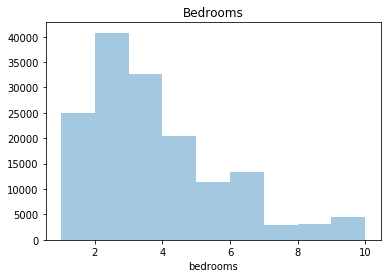

In [11]:
# Display histogram of bedroom counts
sns.distplot(asr_clean['bedrooms'],bins = list(range(1,11)),kde=False)
plt.title('Bedrooms')
plt.show()

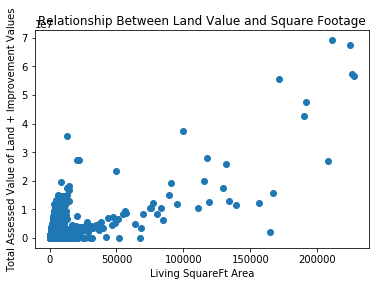

In [12]:
# Investigate relationship between square footage and land value
plt.scatter(asr_clean['sumlivingareasqft'], asr_clean['assdtotalvalue'])
plt.xlabel('Living SquareFt Area')
plt.ylabel('Total Assessed Value of Land + Improvement Values')
plt.title('Relationship Between Land Value and Square Footage')
plt.show()

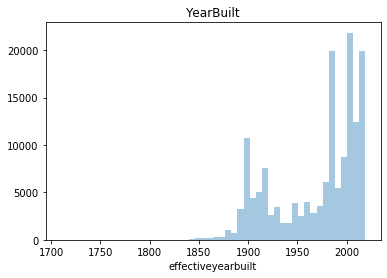

In [13]:
# Distribution of year built
sns.distplot(asr_clean['effectiveyearbuilt'],kde=False)
plt.title('YearBuilt')
plt.show()

In [14]:
numeric_cols = ['lotsizesqft', 'buildingarea', 'bedrooms','totalrooms', 'bathtotalcalc', 'garageparkingnbr', 'assdtotalvalue', 'assdlandvalue', 'taxamount']

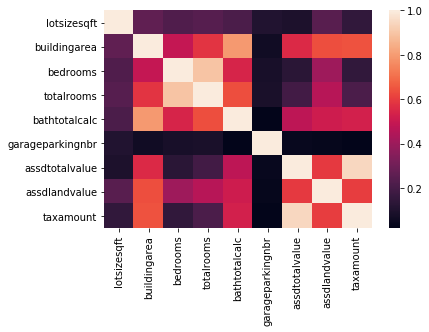

In [15]:
# Correlation heatmap of the numeric columns
sns.heatmap((asr_clean[numeric_cols]).corr(),cmap='rocket')
plt.show()

In [17]:
asr_clean.to_csv('assessordata_clean.csv')